In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec
from scipy import stats
from showyourwork.paths import user as user_paths

paths = user_paths()

# Add the parent directory to the path
sys.path.append(paths.scripts.parent.as_posix())
# isort: split

from scripts.pal5.datasets import data, masks

In [2]:
# Matplotlib style
plt.style.use(paths.scripts / "paper.mplstyle")


lik_tbl = QTable.read(paths.data / "pal5" / "membership_likelhoods.ecsv")
tot_stream_prob = lik_tbl["stream (MLE)"]

tot_stream_prob[~masks["Pal5"]] = 0  # Remove Pal 5

cmap = plt.get_cmap("bone_r")

psort = np.argsort(tot_stream_prob)

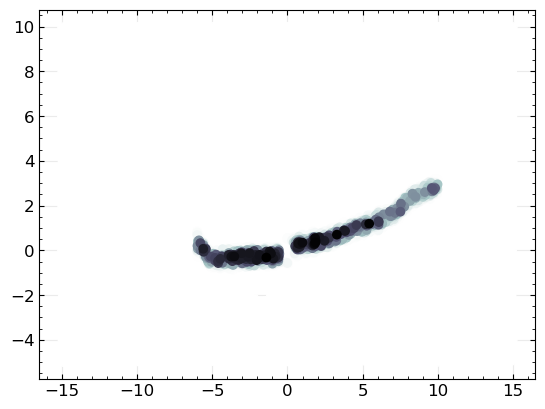

In [3]:
plt.scatter(
    x=data["phi1"][psort], y=data["phi2"][psort], c=tot_stream_prob[psort], cmap=cmap
)

In [4]:
nddata = data.astype(np.ndarray)

Ys = [None, None, None]
Zs = [None, None, None]
for i, k in enumerate(("phi2", "pmphi1", "pmphi2")):
    kernel_inp = np.vstack([nddata["phi1"], nddata[k]])
    kernel = stats.gaussian_kde(kernel_inp, weights=tot_stream_prob, bw_method=0.05)
    X, Ys[i] = np.mgrid[
        nddata["phi1"].min() : nddata["phi1"].max() : 100j,
        nddata[k].min() : nddata[k].max() : 100j,
    ]
    kernal_eval = np.vstack([X.flatten(), Ys[i].flatten()])

    Zs[i] = kernel(kernal_eval).reshape(X.shape)

# Rescale
z_max = max([np.max(Z) for Z in Zs])
Zs = [Z / z_max for Z in Zs]
# Zs = [np.log(Z) for Z in Zs]

In [5]:
Zs[0].min(), Zs[0].max()

(0.0, 1.0)

In [6]:
# ZZs = [None, None, None]
# for i, Z in enumerate(Zs):
#     ZZs = Z.copy()
#     ZZs[ZZs > -0.5] = -100

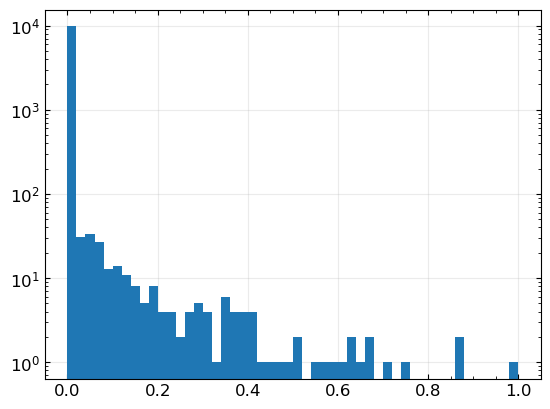

In [7]:
plt.hist(Zs[0].flatten(), bins=50, log=True)
plt.show()

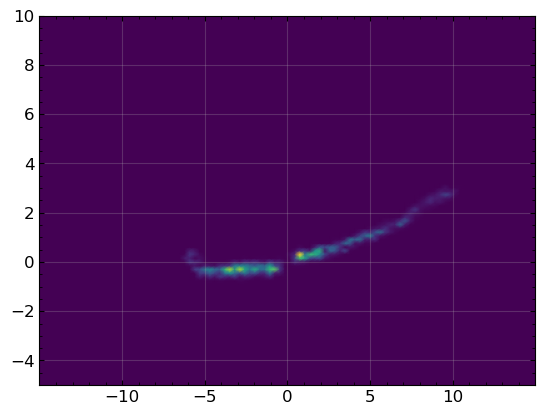

In [8]:
plt.pcolormesh(X, Ys[0], Zs[0], zorder=0, shading="gouraud", cmap="viridis")